https://napari.org/stable/guides/magicgui.html

In [2]:
from magicgui import magicgui
import datetime
import pathlib
import napari
import numpy as np


In [2]:
@magicgui(call_button='Make Points', n_points={'maximum': 200})
def make_points(n_points=40) -> napari.types.LayerDataTuple:
  data = 500 * np.random.rand(n_points, 2)
  return (data, {'name': 'My Points'}, 'points')

viewer = napari.Viewer()
viewer.window.add_dock_widget(make_points)

c:\Users\ge37voy\AppData\Local\miniconda3\envs\xparse\lib\site-packages\magicgui\widgets\_concrete.py:114: FutureWarning: The 'maximum' keyword arguments has been changed to 'max'. In the future this will raise an exception

  super(cls, self).__init__(**kwargs)  # type: ignore


In [14]:
@magicgui(
  call_button='Make Points', 
  n_points={'maximum': 200},
  layer_name={'choices': ["A", "B", "C"]}
  )

def make_points(n_points=40, layer_name="A") -> napari.types.LayerDataTuple:
  data = 500 * np.random.rand(n_points, 2)
  return (data, {'name': layer_name}, 'points')

viewer = napari.Viewer()
make_points.n_points.value = 100
make_points.layer_name.value = "C"
viewer.window.add_dock_widget(make_points)

c:\Users\ge37voy\AppData\Local\miniconda3\envs\xparse\lib\site-packages\magicgui\widgets\_concrete.py:114: FutureWarning: The 'maximum' keyword arguments has been changed to 'max'. In the future this will raise an exception

  super(cls, self).__init__(**kwargs)  # type: ignore


In [16]:
make_points.layer_name.choices = tuple(list("DSFSFD"))

In [7]:
import napari.types

@magicgui(call_button='Make Points')
def make_points(n_points=40) -> napari.types.LayerDataTuple:
  data = 500 * np.random.rand(n_points, 2)
  props = {'values': np.random.rand(n_points)}
  return (data, {'properties': props}, 'points')

viewer = napari.Viewer()
viewer.window.add_dock_widget(make_points)

In [13]:
make_points.n_points.value

100

In [20]:
make_points.layer_name.get_value

RuntimeError: wrapped C/C++ object of type QComboBox has been deleted

In [18]:
dir(make_points.layer_name)

['__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__magicgui_app__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allow_multiple',
 '_annotation',
 '_bound_value',
 '_call_bound',
 '_default_choices',
 '_emit_parent',
 '_explicitly_hidden',
 '_ipython_display_',
 '_is_protocol',
 '_label',
 '_labeled_widget',
 '_labeled_widget_ref',
 '_nullable',
 '_on_value_change',
 '_param_kind',
 '_post_init',
 '_repr_mimebundle_',
 '_repr_png_',
 '_visible',
 '_widget',
 'annotation',
 'bind',
 'changed',
 'choices',
 'close',
 'current_choice',
 'del_choice',
 'enabled',
 'get_choice',
 'get_value',
 'gui_only',
 'hei

__main__.MyGui

In [4]:
from magicgui.widgets import FunctionGui

def make_points(n_points=40, name="A") -> napari.types.LayerDataTuple:
    data = 500 * np.random.rand(n_points, 2)
    return (data, {'name': name}, 'points')

class MyGui(FunctionGui):
    def __init__(self):
        super().__init__(
          make_points,
          call_button=True,
          layout='vertical',
          #param_options={...}
        )
        # do whatever other initialization you want here

viewer = napari.Viewer()
viewer.window.add_dock_widget(MyGui)

TypeError: "widget" must be a QWidget or a sequence of QWidgets

In [ ]:
from magicgui.widgets import FunctionGui

def make_points(n_points=40, name="A") -> napari.types.LayerDataTuple:
  data = 500 * np.random.rand(n_points, 2)
  return (data, {'name': name}, 'points')

class MyGui(FunctionGui):
    def __init__(self):
        super().__init__(
          make_points,
          call_button=True,
          layout='vertical',
          #param_options={...}
        )
        # do whatever other initialization you want here

@napari_hook_implementation
def napari_experimental_provide_dock_widget():
    return MyGui

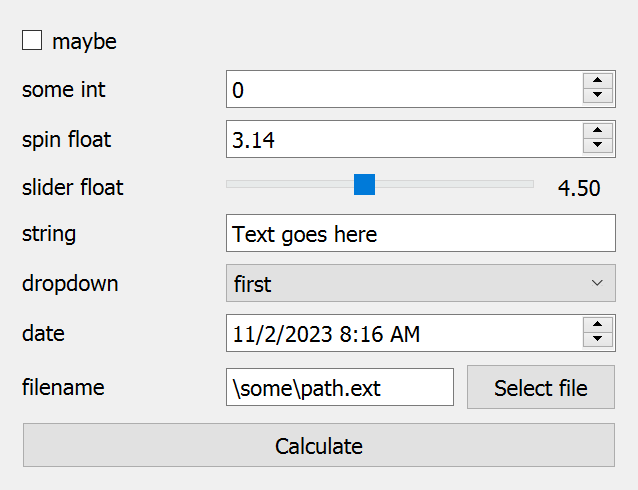

: 

In [ ]:

@magicgui(
    call_button="Calculate",
    slider_float={"widget_type": "FloatSlider", 'max': 10},
    dropdown={"choices": ['first', 'second', 'third']},
)
def widget_demo(
    maybe: bool,
    some_int: int,
    spin_float=3.14159,
    slider_float=4.5,
    string="Text goes here",
    dropdown='first',
    date=datetime.datetime.now(),
    filename=pathlib.Path('/some/path.ext')
):
    ...

widget_demo.show()

## Test napari general

In [2]:
from insitupy import CustomPalettes

In [3]:
palettes = CustomPalettes()

In [8]:
palettes.tab20_mod.colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#bcbd22',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896',
 '#c5b0d5',
 '#c49c94',
 '#f7b6d2',
 '#dbdb8d',
 '#9edae5']

In [9]:
import napari
from skimage import data
import numpy as np

# set parameters for point generation
n_points = 100
n_clusters = 17
color_cycle = ['#1f77b4',
                '#ff7f0e',
                '#2ca02c',
                '#d62728',
                '#9467bd',
                '#8c564b',
                '#e377c2',
                '#bcbd22',
                '#17becf',
                '#aec7e8',
                '#ffbb78',
                '#98df8a',
                '#ff9896',
                '#c5b0d5',
                '#c49c94',
                '#f7b6d2',
                '#dbdb8d',
                '#9edae5'
            ]

points = np.random.rand(n_points, 2) * 100

# start viewer
viewer = napari.view_image(data.astronaut(), rgb=True)

# set point properties
point_properties = {
    'abc': np.random.choice([str(elem) for elem in np.arange(n_clusters)], n_points),
    #'abc': np.random.choice([elem for elem in np.arange(n_clusters)], n_points)
}

# add points
points_layer = viewer.add_points(
    points,
    properties=point_properties,
    face_color='abc',
    face_color_cycle=color_cycle,
    edge_width=0.1,
)

ValidationError: 1 validation error for ColorManager
__root__
  Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe' (type=type_error)

In [ ]:
import napari
from skimage import data
import numpy as np

# set parameters for point generation
n_points = 100
n_clusters = 17
points = np.random.rand(n_points, 2) * 100

# start viewer
viewer = napari.view_image(data.astronaut(), rgb=True)

# set point properties
point_properties = {
    'abc': np.random.choice([str(elem) for elem in np.arange(n_clusters)], n_points),
    #'abc': np.random.choice([elem for elem in np.arange(n_clusters)], n_points)
}

# add points
points_layer = viewer.add_points(
    points,
    properties=point_properties,
    face_color='abc',
    face_color_cycle=['magenta', 'green'],
    edge_width=0.1,
)

In [50]:
!napari --info

napari: 0.4.18
Platform: Windows-10-10.0.19045-SP0
Python: 3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
Qt: 5.15.2
PyQt5: 5.15.9
NumPy: 1.25.2
SciPy: 1.9.3
Dask: 2023.9.2
VisPy: 0.12.2
magicgui: 0.7.3
superqt: 0.6.0
in-n-out: 0.1.8
app-model: 0.2.2
npe2: 0.7.2

OpenGL:
  - GL version:  4.6.0 Compatibility Profile Context 23.10.24.05.230830
  - MAX_TEXTURE_SIZE: 16384

Screens:
  - screen 1: resolution 2560x1600, scale 1.0
  - screen 2: resolution 3840x2160, scale 1.0
  - screen 3: resolution 2880x1800, scale 1.0

Settings path:
  - C:\Users\ge37voy\AppData\Local\napari\xparse_57fe1a37b30a9e37de3a06866d324c7f56a92d1a\settings.yaml
Plugins:
  - napari: 0.4.18 (77 contributions)
  - napari-console: 0.0.8 (0 contributions)
  - napari-svg: 0.1.10 (2 contributions)
  - ome-types: 0.4.2 (2 contributions)


In [14]:
list("ABC")

['A', 'B', 'C']